<a href="https://colab.research.google.com/github/pedrovi34/ANOMALIAS/blob/main/c%C3%B3digo_de_anamolias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                    timestamp  frequencia_cardiaca  pressao_arterial  \
0  2024-12-18 17:00:51.456449            78.617357        193.869505   
1  2024-12-18 16:59:51.456451            86.476885        180.894456   
2  2024-12-18 16:58:51.456453            95.230299        170.295948   
3  2024-12-18 16:57:51.456454            77.658466        190.473350   
4  2024-12-18 16:54:51.456459            87.674347        189.527577   

   temperatura  oxigenacao  anomalia  
0    39.855481   93.279230         1  
1    39.207580   94.172789         0  
2    39.692038   98.775375         1  
3    38.106385   96.113106         1  
4    39.182911   91.905392         1  


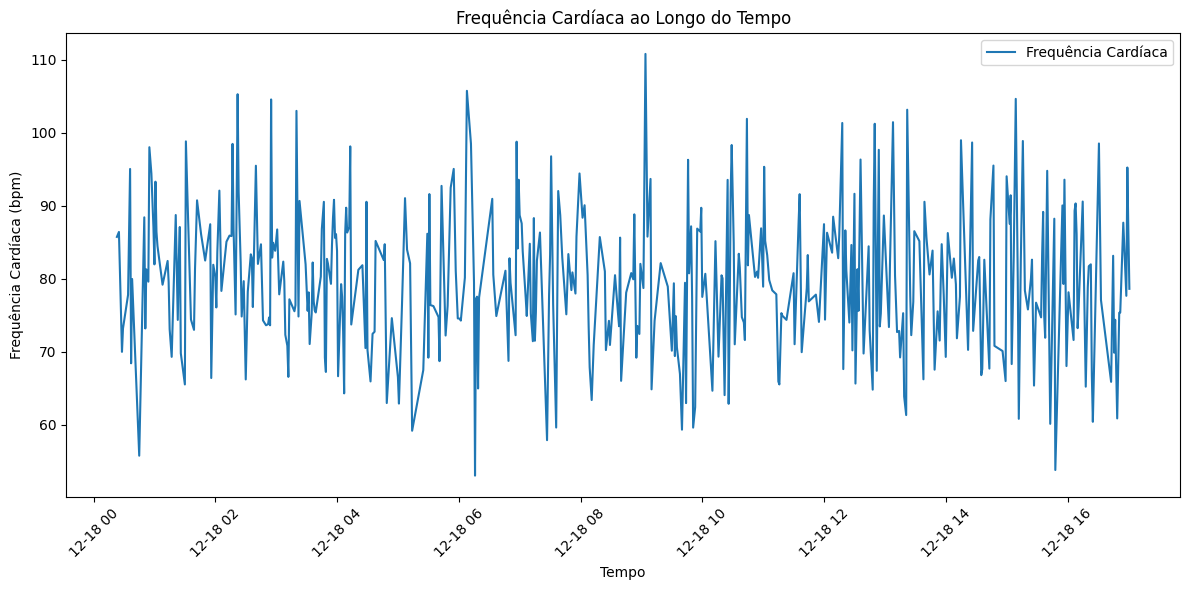

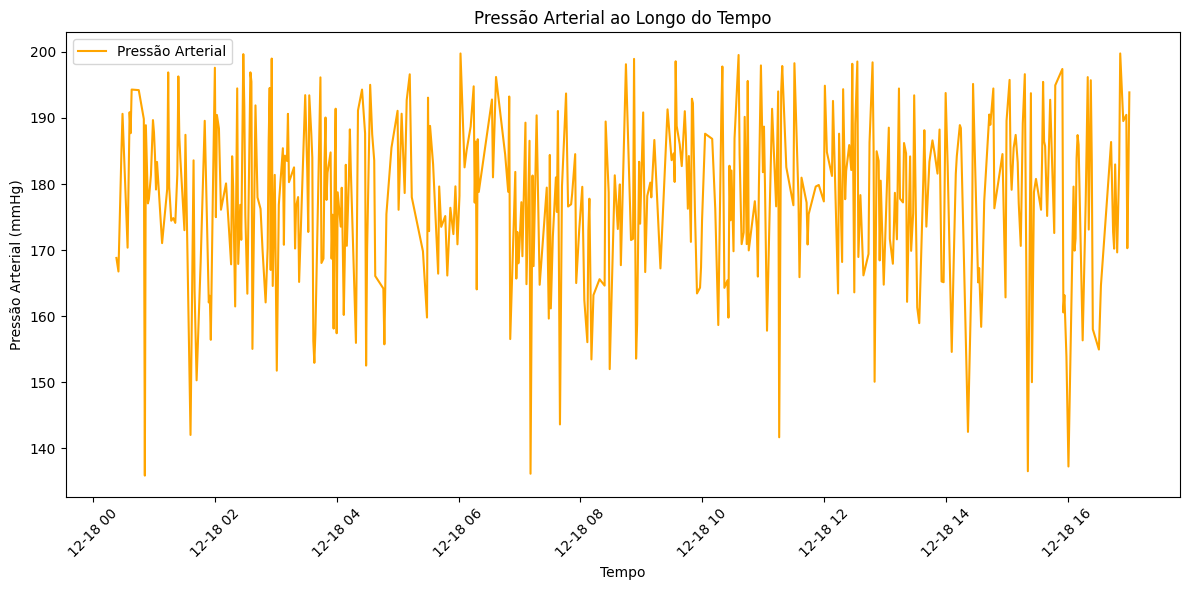

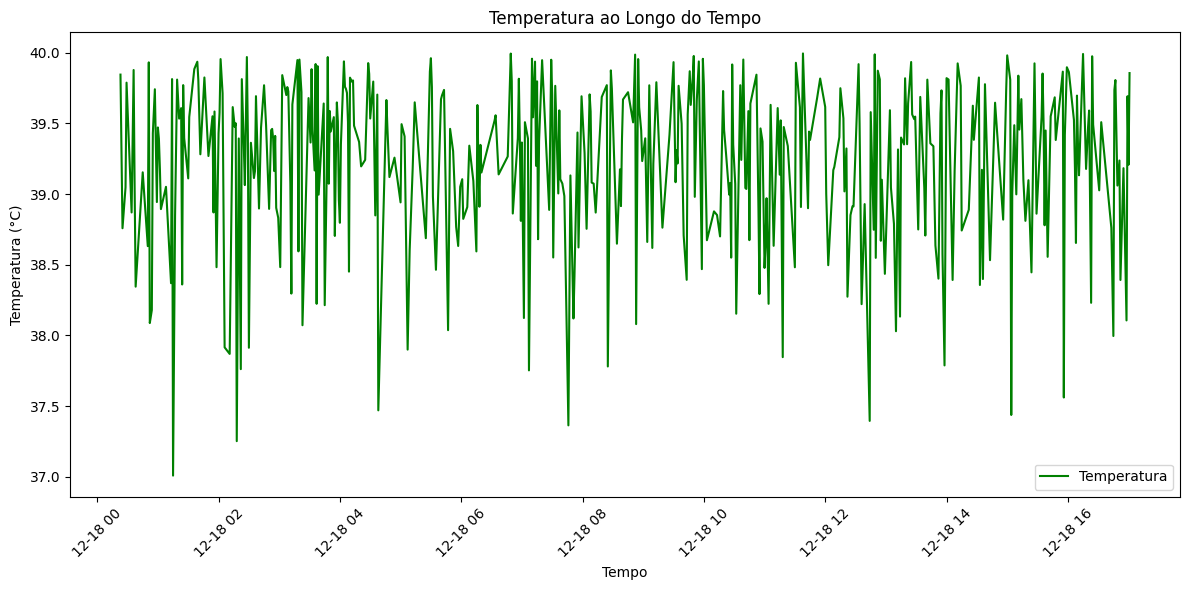

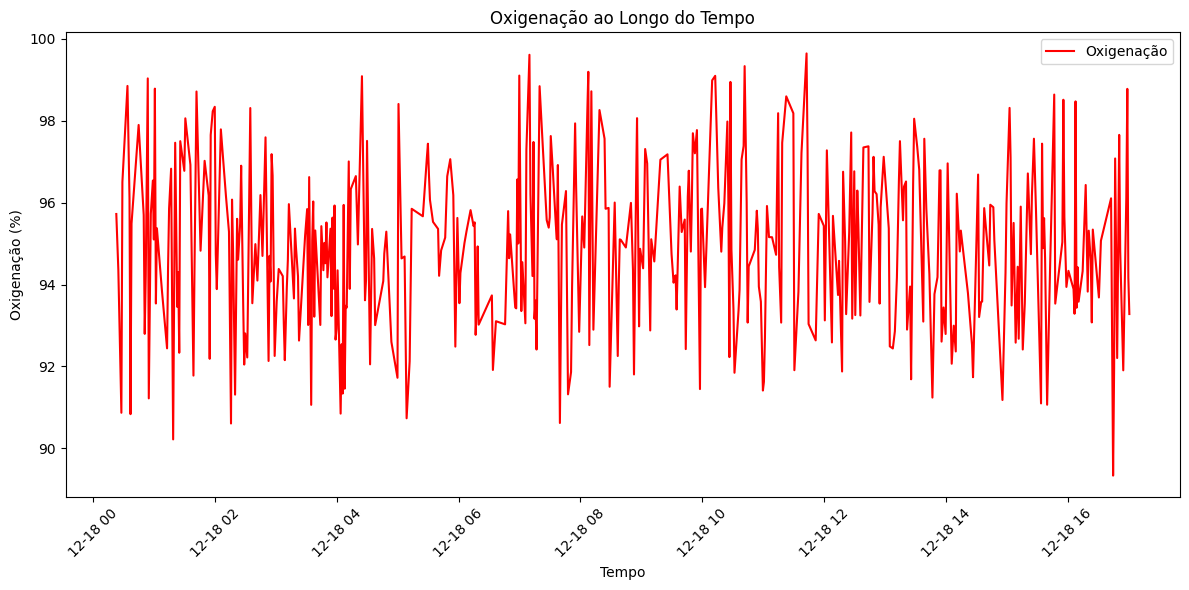

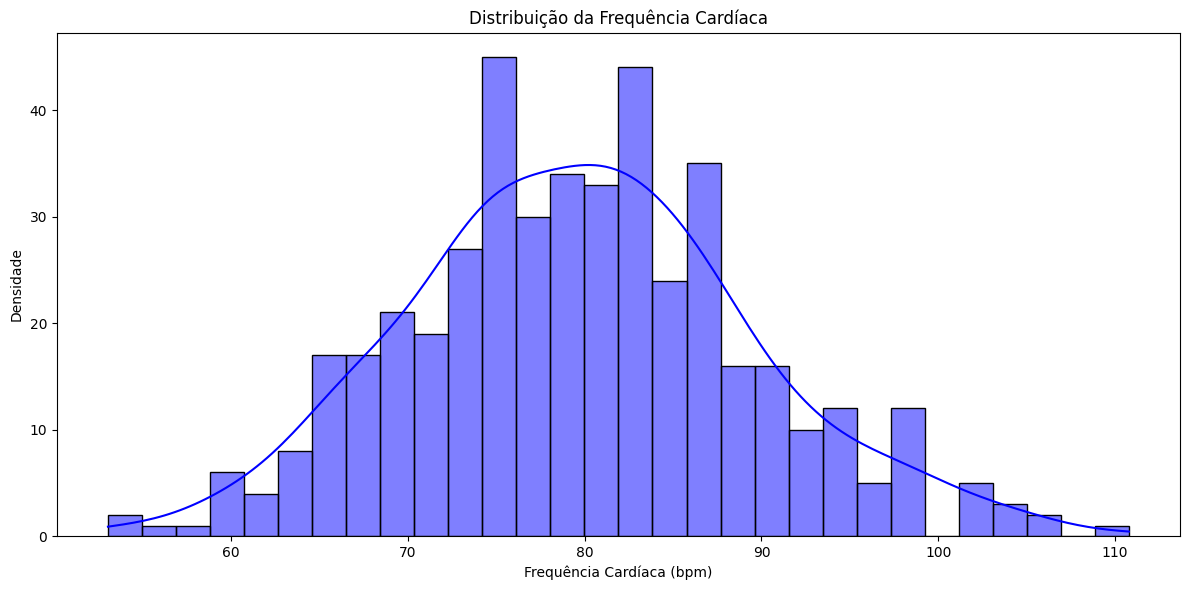

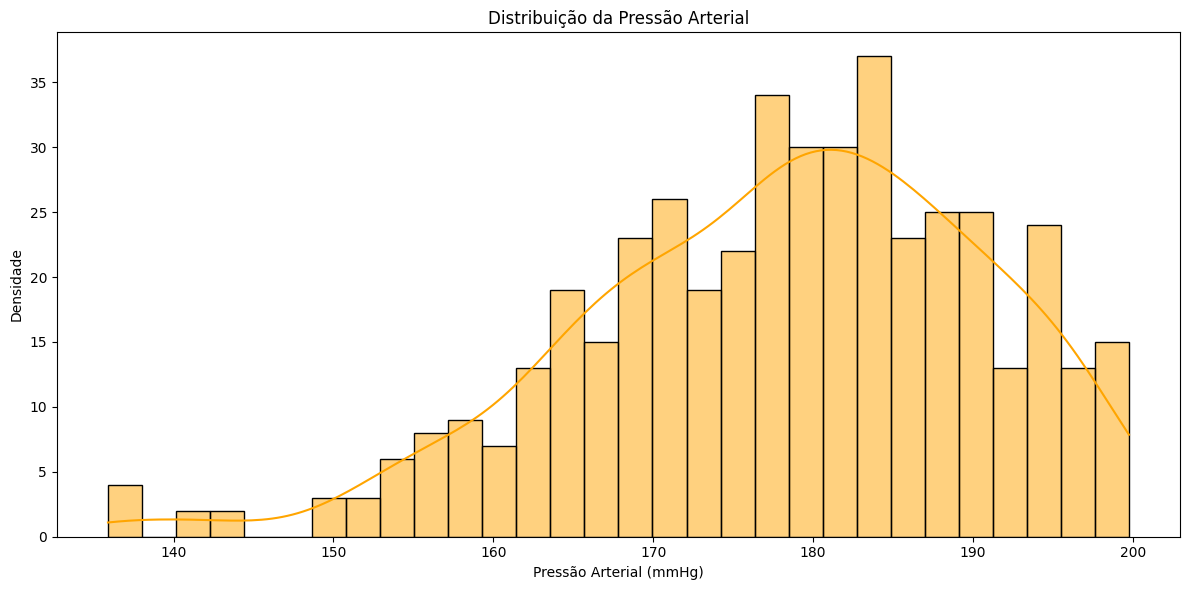

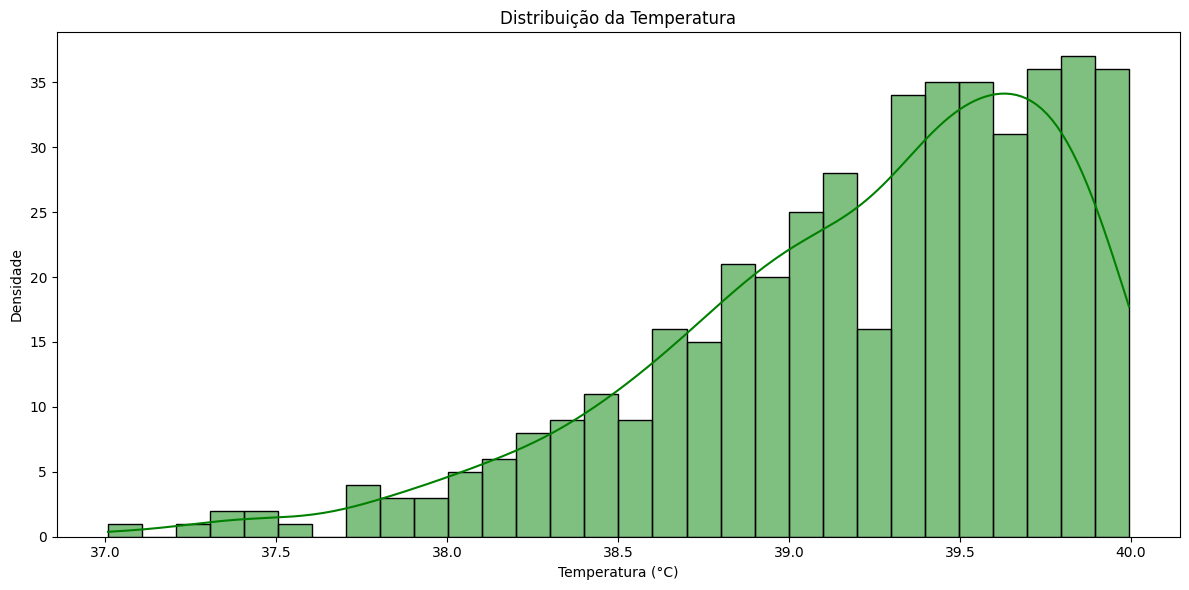

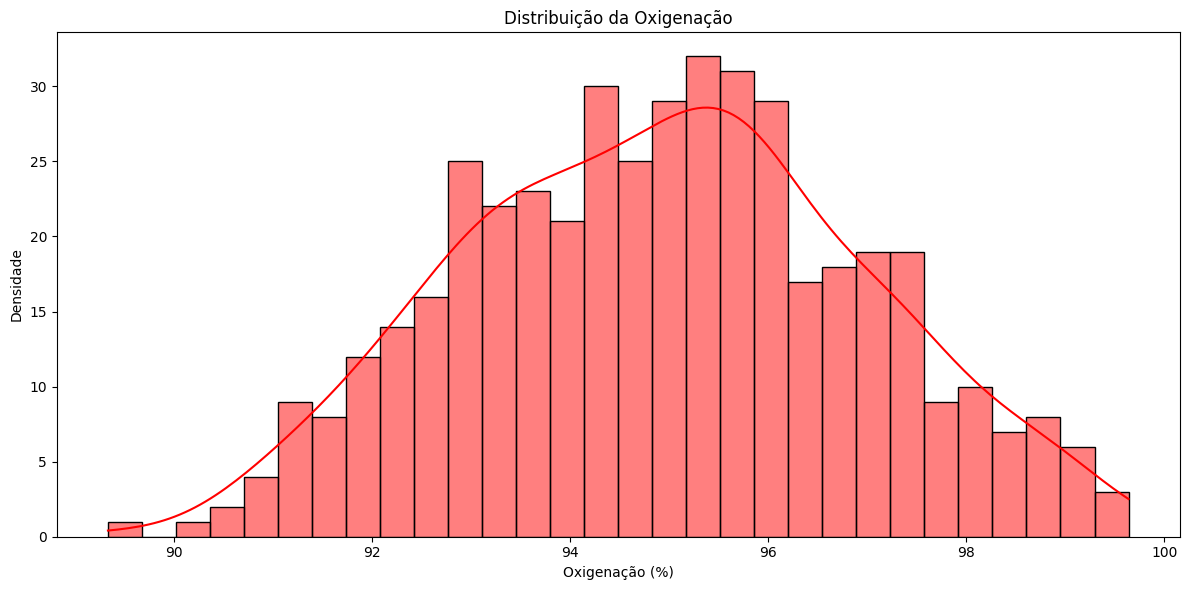

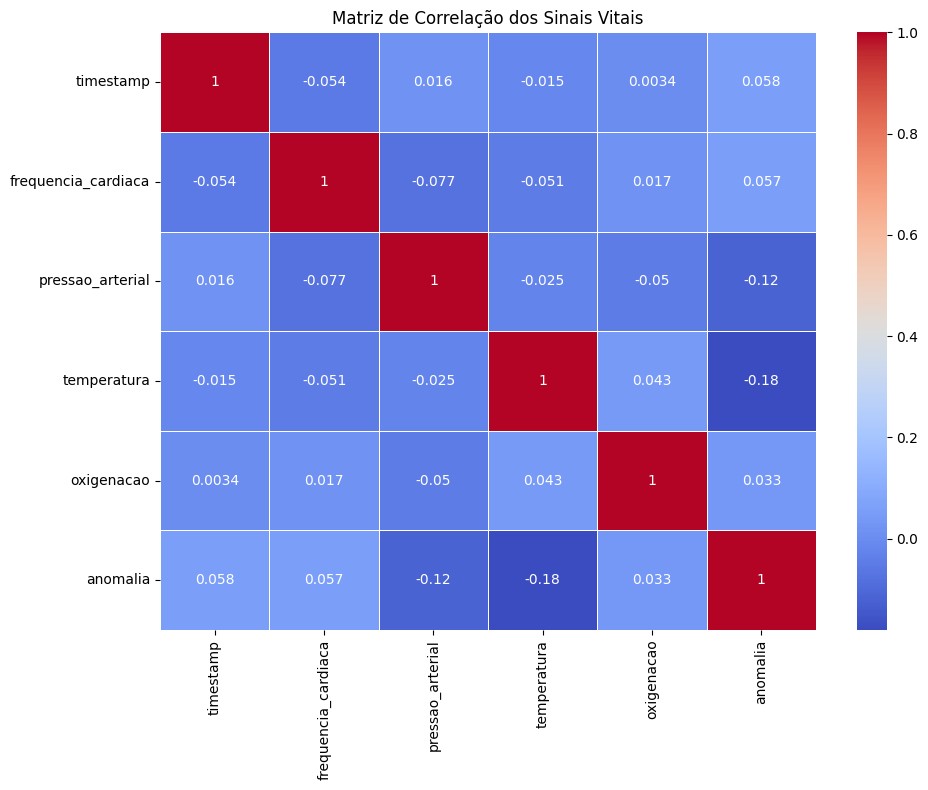

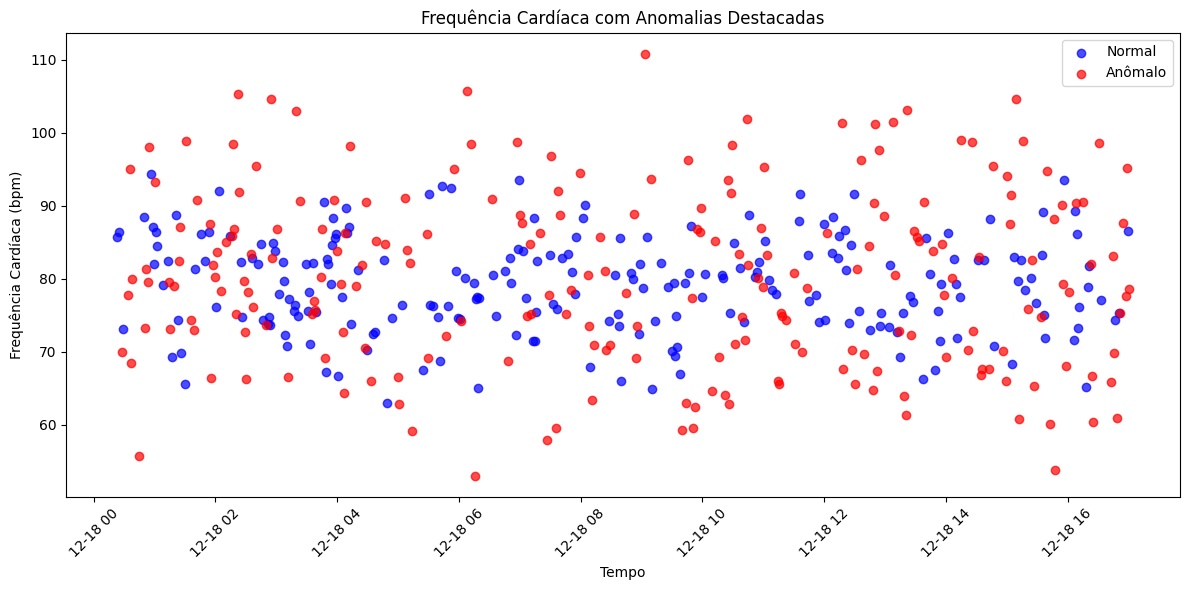

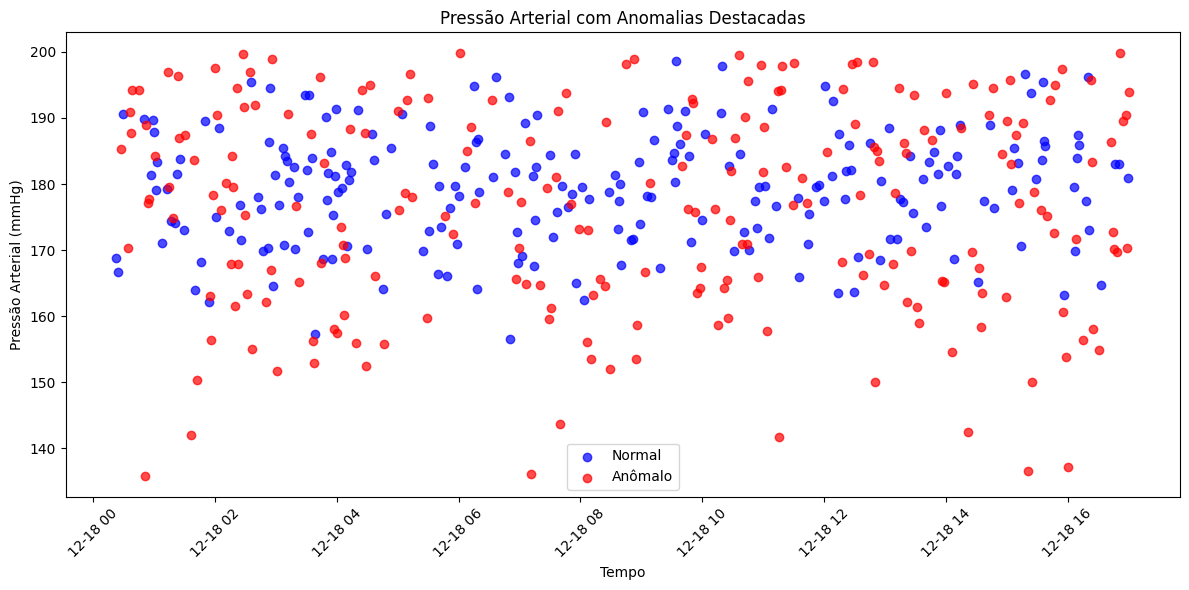

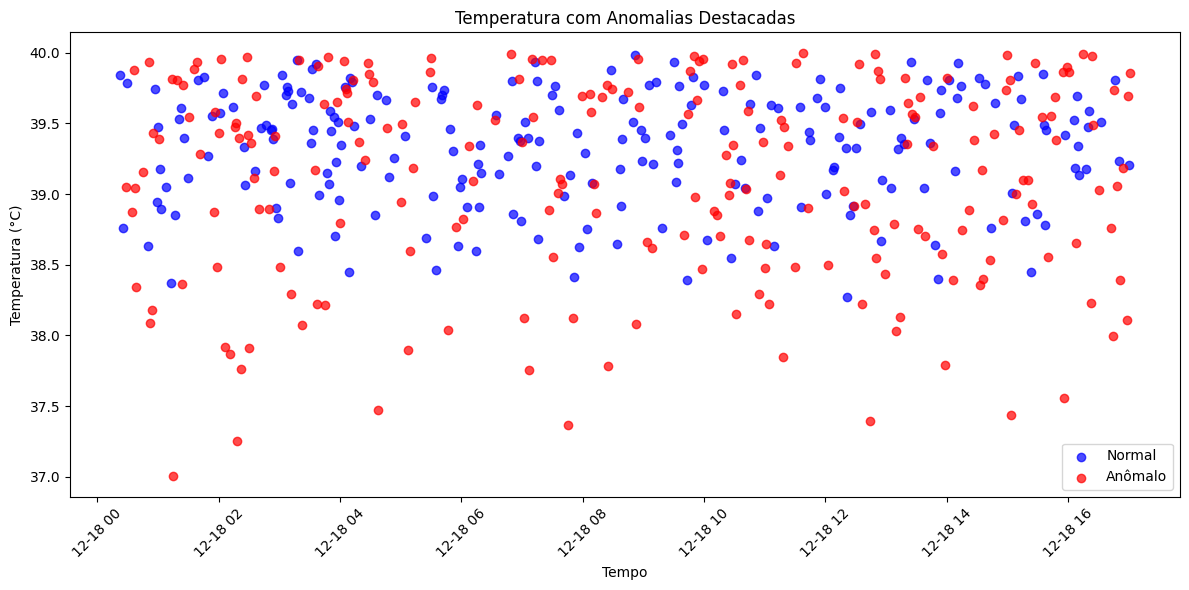

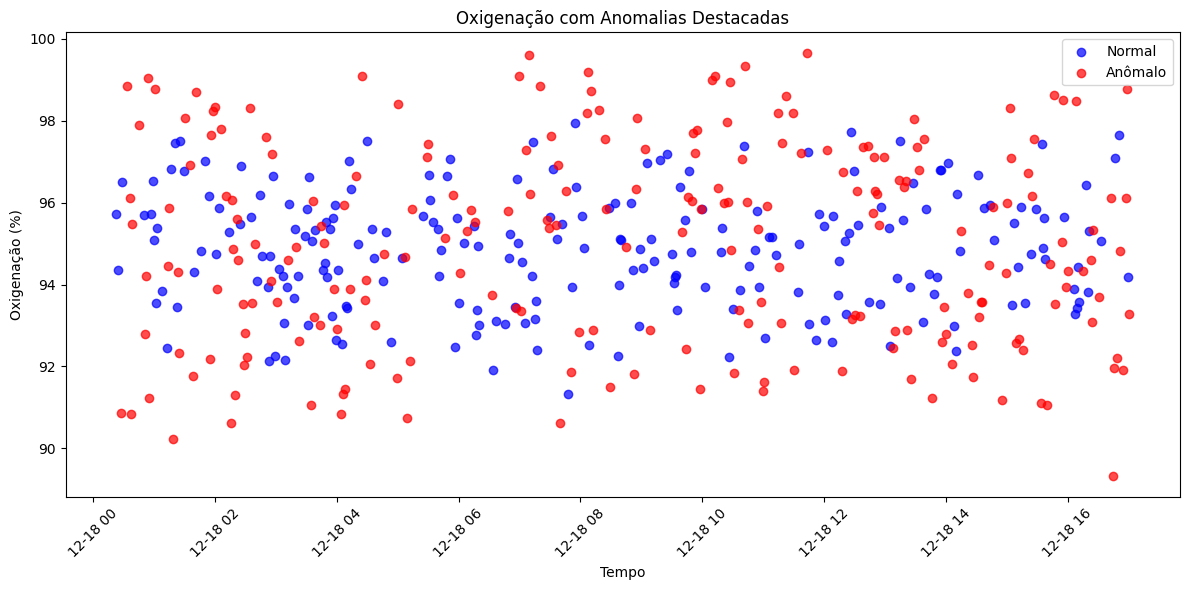

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

# Carregar o arquivo CSV
url = "https://github.com/pedrovi34/ANOMALIAS/blob/main/dados_utei_com_anomalias%20(1).csv?raw=true"
dados_utei = pd.read_csv(url)

# Exibir as primeiras linhas do dataset
print(dados_utei.head())

# Conversão da coluna 'timestamp' para datetime
dados_utei['timestamp'] = pd.to_datetime(dados_utei['timestamp'])

# Limpeza de Dados (filtro de valores, caso necessário)
dados_utei = dados_utei.dropna()
dados_utei = dados_utei[(dados_utei['frequencia_cardiaca'] > 30) & (dados_utei['frequencia_cardiaca'] < 200)]
dados_utei = dados_utei[(dados_utei['pressao_arterial'] > 60) & (dados_utei['pressao_arterial'] < 200)]
dados_utei = dados_utei[(dados_utei['temperatura'] > 34) & (dados_utei['temperatura'] < 40)]
dados_utei = dados_utei[(dados_utei['oxigenacao'] > 80) & (dados_utei['oxigenacao'] < 100)]

# Gráficos dos sinais vitais ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(dados_utei['timestamp'], dados_utei['frequencia_cardiaca'], label='Frequência Cardíaca')
plt.xlabel('Tempo')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.title('Frequência Cardíaca ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dados_utei['timestamp'], dados_utei['pressao_arterial'], label='Pressão Arterial', color='orange')
plt.xlabel('Tempo')
plt.ylabel('Pressão Arterial (mmHg)')
plt.title('Pressão Arterial ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dados_utei['timestamp'], dados_utei['temperatura'], label='Temperatura', color='green')
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(dados_utei['timestamp'], dados_utei['oxigenacao'], label='Oxigenação', color='red')
plt.xlabel('Tempo')
plt.ylabel('Oxigenação (%)')
plt.title('Oxigenação ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Distribuição das variáveis
plt.figure(figsize=(12, 6))
sns.histplot(dados_utei['frequencia_cardiaca'], kde=True, bins=30, color='blue')
plt.title('Distribuição da Frequência Cardíaca')
plt.xlabel('Frequência Cardíaca (bpm)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dados_utei['pressao_arterial'], kde=True, bins=30, color='orange')
plt.title('Distribuição da Pressão Arterial')
plt.xlabel('Pressão Arterial (mmHg)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dados_utei['temperatura'], kde=True, bins=30, color='green')
plt.title('Distribuição da Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(dados_utei['oxigenacao'], kde=True, bins=30, color='red')
plt.title('Distribuição da Oxigenação')
plt.xlabel('Oxigenação (%)')
plt.ylabel('Densidade')
plt.tight_layout()
plt.show()

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(dados_utei.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação dos Sinais Vitais')
plt.tight_layout()
plt.show()

# Modelagem com One-Class SVM
X = dados_utei[['frequencia_cardiaca', 'pressao_arterial', 'temperatura', 'oxigenacao']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Treinamento do modelo One-Class SVM
svm_model = OneClassSVM(gamma='auto')
svm_model.fit(X_scaled)
dados_utei['anomalia'] = svm_model.predict(X_scaled)

# Para SVM, -1 indica anomalias, 1 indica normais
dados_utei['anomalia'] = dados_utei['anomalia'].apply(lambda x: 1 if x == -1 else 0)

# Gráfico de Anomalias para cada variável
dados_normais = dados_utei[dados_utei['anomalia'] == 0]
dados_anomalos = dados_utei[dados_utei['anomalia'] == 1]

plt.figure(figsize=(12, 6))
plt.scatter(dados_normais['timestamp'], dados_normais['frequencia_cardiaca'], label='Normal', alpha=0.7, color='blue')
plt.scatter(dados_anomalos['timestamp'], dados_anomalos['frequencia_cardiaca'], label='Anômalo', alpha=0.7, color='red')
plt.xlabel('Tempo')
plt.ylabel('Frequência Cardíaca (bpm)')
plt.title('Frequência Cardíaca com Anomalias Destacadas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(dados_normais['timestamp'], dados_normais['pressao_arterial'], label='Normal', alpha=0.7, color='blue')
plt.scatter(dados_anomalos['timestamp'], dados_anomalos['pressao_arterial'], label='Anômalo', alpha=0.7, color='red')
plt.xlabel('Tempo')
plt.ylabel('Pressão Arterial (mmHg)')
plt.title('Pressão Arterial com Anomalias Destacadas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(dados_normais['timestamp'], dados_normais['temperatura'], label='Normal', alpha=0.7, color='blue')
plt.scatter(dados_anomalos['timestamp'], dados_anomalos['temperatura'], label='Anômalo', alpha=0.7, color='red')
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura com Anomalias Destacadas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(dados_normais['timestamp'], dados_normais['oxigenacao'], label='Normal', alpha=0.7, color='blue')
plt.scatter(dados_anomalos['timestamp'], dados_anomalos['oxigenacao'], label='Anômalo', alpha=0.7, color='red')
plt.xlabel('Tempo')
plt.ylabel('Oxigenação (%)')
plt.title('Oxigenação com Anomalias Destacadas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
